In [11]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MaxAbsScaler
from math import sqrt


In [4]:
filepath_input_data = 'yacht_hydro.csv'
input_data_df = pd.read_csv(filepath_input_data)
input_data_df = input_data_df.rename(columns={
'LC' : 'Long pos',
'PC' :'Prismatic coeff',
'L/D': 'Length-displacement ratio',
'B/Dr' : 'Beam-draught ratio',
'L/B':'Length-beam ratio',
'Fr':'Froude number',
'Rr' : 'Residuary resistance'
})

In [5]:
display(input_data_df.head(3))
display(input_data_df.tail(3))
display(input_data_df.describe())

,Long pos,Prismatic coeff,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,Froude number,Residuary resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47


,Long pos,Prismatic coeff,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,Froude number,Residuary resistance
305,-2.3,0.6,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.6,4.34,4.23,2.73,0.425,30.48
307,-2.3,0.6,4.34,4.23,2.73,0.450,46.66


,Long pos,Prismatic coeff,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,Froude number,Residuary resistance
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


In [6]:
input_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Long pos                   308 non-null    float64
 1   Prismatic coeff            308 non-null    float64
 2   Length-displacement ratio  308 non-null    float64
 3   Beam-draught ratio         308 non-null    float64
 4   Length-beam ratio          308 non-null    float64
 5   Froude number              308 non-null    float64
 6   Residuary resistance       308 non-null    float64
dtypes: float64(7)
memory usage: 17.0 KB


In [7]:
input_data_df.isnull().sum()

Long pos                     0
Prismatic coeff              0
Length-displacement ratio    0
Beam-draught ratio           0
Length-beam ratio            0
Froude number                0
Residuary resistance         0
dtype: int64

In [8]:
scaler = MaxAbsScaler()
input_data_scaled = scaler.fit_transform(input_data_df)
input_data_scaled_df = pd.DataFrame(input_data_scaled, columns=input_data_df.columns)

In [9]:
extract_scaling_function = np.ones((1, input_data_scaled_df.shape[1]))
extract_scaling_function = scaler.inverse_transform(extract_scaling_function)
display(input_data_scaled_df.head(3))

,Long pos,Prismatic coeff,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,Froude number,Residuary resistance
0,-0.46,0.946667,0.929961,0.745794,0.870879,0.277778,0.001762
1,-0.46,0.946667,0.929961,0.745794,0.870879,0.333333,0.004326
2,-0.46,0.946667,0.929961,0.745794,0.870879,0.388889,0.007530


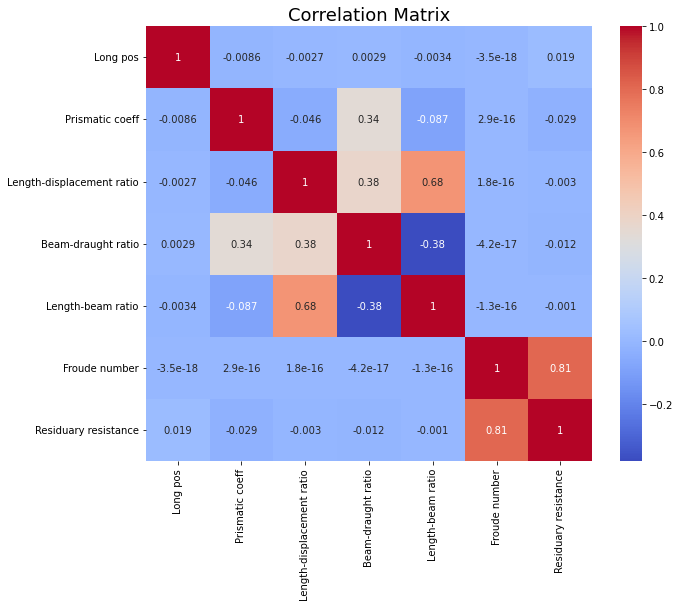

In [12]:
corr_matrix = input_data_df.corr()

fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

ax.set_title("Correlation Matrix", fontsize=18)

plt.show()

In [25]:
X = input_data_scaled_df.drop(['Residuary resistance'], axis=1).values
y = input_data_scaled_df['Residuary resistance'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [26]:
datasets = {}
comment = 'original dataset; scaled; 6 inputs, 1 output'
dataset_id = 'scaled_raw'

datasets[dataset_id] = {'X_train': X_train, 'X_test' : X_test,
'y_train': y_train, 'y_test' : y_test,
'scaler' : scaler,
'scaler_array' : extract_scaling_function,
'comment' : comment,
'dataset' : dataset_id}

In [36]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)
kfold_vs_size = KFold(n_splits=5, shuffle=True, random_state=42)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Evaluation metrics for dataset  scaled_raw
R^2 score:  0.998088472215379
Mean Squared Error:  7.289772037735152e-05
Mean Absolute Error:  0.00536678346132512
MSE (true scale):  0.22163965783061895
RMSE (true scale):  0.47078621244745367
MAE (true scale):  0.29592444005746715
MedAE (true scale):  0.15753444408843326


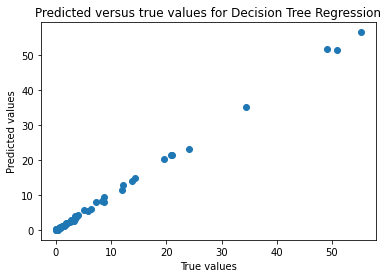

In [62]:
def train_test_decision_tree_regression(X_train, X_test, y_train, y_test, scorer, dataset_id, kfold_vs_size):
    decision_tree_regression = DecisionTreeRegressor(random_state=42)
    grid_parameters_decision_tree_regression = {'max_depth' : [None, 3, 5, 7, 9, 10, 11]}
    start_time = time.time()
    grid_obj = GridSearchCV(decision_tree_regression, param_grid=grid_parameters_decision_tree_regression, 
                            cv=kfold_vs_size, n_jobs=-1, scoring=scorer, verbose=1)
    grid_fit = grid_obj.fit(X_train, y_train)
    training_time = time.time() - start_time
    best_decision_tree_regression = grid_fit.best_estimator_
    prediction = best_decision_tree_regression.predict(X_test)
    r2 = r2_score(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    mae = mean_absolute_error(y_true=y_test, y_pred=prediction)
    
    # Compute evaluation metrics on true scale
    prediction_true_scale = prediction * datasets[dataset_id]['scaler_array'][:,-1]
    y_test_true_scale = y_test * datasets[dataset_id]['scaler_array'][:,-1]
    mae_true_scale = mean_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    medae_true_scale = median_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    mse_true_scale = mean_squared_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    MSE_true_scale = mse_true_scale * (y_test.max() - y_test.min())**2
    RMSE_true_scale = sqrt(MSE_true_scale)
    MAE_true_scale = mae_true_scale * (y_test.max() - y_test.min())
    MedAE_true_scale = medae_true_scale * (y_test.max() - y_test.min())

    # Print evaluation metrics
    print("Evaluation metrics for dataset ", dataset_id)
    print("R^2 score: ", r2)
    print("Mean Squared Error: ", mse)
    print("Mean Absolute Error: ", mae)
    print("MSE (true scale): ", MSE_true_scale)
    print("RMSE (true scale): ", RMSE_true_scale)
    print("MAE (true scale): ", MAE_true_scale)
    print("MedAE (true scale): ", MedAE_true_scale)
    
    # Compute prediction on true scale
    prediction_true_scale = prediction * datasets[dataset_id]['scaler_array'][:,-1]
    y_test_true_scale = y_test * datasets[dataset_id]['scaler_array'][:,-1]

    # Plot predicted versus true values
    plt.scatter(y_test_true_scale, prediction_true_scale)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title('Predicted versus true values for Decision Tree Regression')
    plt.show()

train_test_decision_tree_regression(X_train, X_test, y_train, y_test, scorer, dataset_id, kfold_vs_size)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Evaluation metrics for dataset  scaled_raw
R^2 score:  0.8646891239266574
Mean Squared Error:  0.005160194106184341
Mean Absolute Error:  0.06558055499600267
MSE (true scale):  15.68915530024735
RMSE (true scale):  3.9609538371770188
MAE (true scale):  3.6161118024795877
MedAE (true scale):  3.9580899260609184


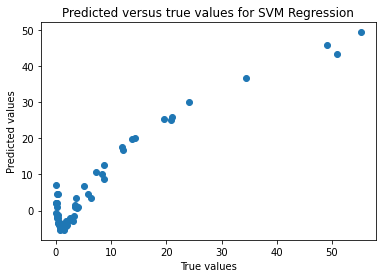

In [54]:
from sklearn.svm import SVR

def train_test_svm_regression(X_train, X_test, y_train, y_test, scorer, dataset_id, kfold_vs_size):
    # Reshape y_train and y_test using ravel()
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    svm_regression = SVR()
    grid_parameters_svm_regression = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
                                      'C': [0.1, 1, 10], 
                                      'gamma': ['scale', 'auto']}
    start_time = time.time()
    grid_obj = GridSearchCV(svm_regression, param_grid=grid_parameters_svm_regression, 
                            cv=kfold_vs_size, n_jobs=-1, scoring=scorer, verbose=1)
    grid_fit = grid_obj.fit(X_train, y_train)
    training_time = time.time() - start_time
    best_svm_regression = grid_fit.best_estimator_
    prediction = best_svm_regression.predict(X_test)
    r2 = r2_score(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    mae = mean_absolute_error(y_true=y_test, y_pred=prediction)
    
    # Compute evaluation metrics on true scale
    prediction_true_scale = prediction * datasets[dataset_id]['scaler_array'][:,-1]
    y_test_true_scale = y_test * datasets[dataset_id]['scaler_array'][:,-1]
    mae_true_scale = mean_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    medae_true_scale = median_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    mse_true_scale = mean_squared_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    MSE_true_scale = mse_true_scale * (y_test.max() - y_test.min())**2
    RMSE_true_scale = sqrt(MSE_true_scale)
    MAE_true_scale = mae_true_scale * (y_test.max() - y_test.min())
    MedAE_true_scale = medae_true_scale * (y_test.max() - y_test.min())

    # Print evaluation metrics
    print("Evaluation metrics for dataset ", dataset_id)
    print("R^2 score: ", r2)
    print("Mean Squared Error: ", mse)
    print("Mean Absolute Error: ", mae)
    print("MSE (true scale): ", MSE_true_scale)
    print("RMSE (true scale): ", RMSE_true_scale)
    print("MAE (true scale): ", MAE_true_scale)
    print("MedAE (true scale): ", MedAE_true_scale)
    
      # Compute prediction on true scale
    prediction_true_scale = prediction * datasets[dataset_id]['scaler_array'][:,-1]
    y_test_true_scale = y_test * datasets[dataset_id]['scaler_array'][:,-1]

    # Plot predicted versus true values
    plt.scatter(y_test_true_scale, prediction_true_scale)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title('Predicted versus true values for SVM Regression')
    plt.show()
    
train_test_svm_regression(X_train, X_test, y_train, y_test, scorer, dataset_id, kfold_vs_size)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Evaluation metrics for dataset  scaled_raw
R^2 score:  0.9978534788045151
Mean Squared Error:  8.185939181811889e-05
Mean Absolute Error:  0.004962635308697607
MSE (true scale):  0.24888689932788846
RMSE (true scale):  0.4988856575688346
MAE (true scale):  0.27363971092158607
MedAE (true scale):  0.11720089405868084


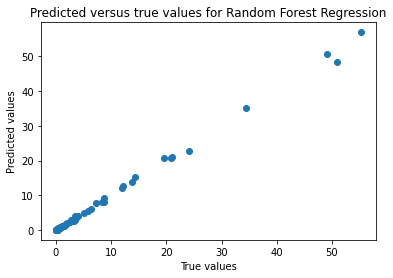

In [52]:
from sklearn.ensemble import RandomForestRegressor

def train_test_random_forest_regression(X_train, X_test, y_train, y_test, scorer, dataset_id, kfold_vs_size):
    # Reshape y_train and y_test using ravel()
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    random_forest_regression = RandomForestRegressor(random_state=42)
    grid_parameters_random_forest_regression = {'max_depth' : [None, 3, 5, 7, 9, 10, 11], 'n_estimators': [50, 100, 200, 300]}
    start_time = time.time()
    grid_obj = GridSearchCV(random_forest_regression, param_grid=grid_parameters_random_forest_regression, 
                            cv=kfold_vs_size, n_jobs=-1, scoring=scorer, verbose=1)
    grid_fit = grid_obj.fit(X_train, y_train)
    training_time = time.time() - start_time
    best_random_forest_regression = grid_fit.best_estimator_
    prediction = best_random_forest_regression.predict(X_test)
    r2 = r2_score(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    mae = mean_absolute_error(y_true=y_test, y_pred=prediction)
    
    # Compute evaluation metrics on true scale
    prediction_true_scale = prediction * datasets[dataset_id]['scaler_array'][:,-1]
    y_test_true_scale = y_test * datasets[dataset_id]['scaler_array'][:,-1]
    mae_true_scale = mean_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    medae_true_scale = median_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    mse_true_scale = mean_squared_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    MSE_true_scale = mse_true_scale * (y_test.max() - y_test.min())**2
    RMSE_true_scale = sqrt(MSE_true_scale)
    MAE_true_scale = mae_true_scale * (y_test.max() - y_test.min())
    MedAE_true_scale = medae_true_scale * (y_test.max() - y_test.min())

    # Print evaluation metrics
    print("Evaluation metrics for dataset ", dataset_id)
    print("R^2 score: ", r2)
    print("Mean Squared Error: ", mse)
    print("Mean Absolute Error: ", mae)
    print("MSE (true scale): ", MSE_true_scale)
    print("RMSE (true scale): ", RMSE_true_scale)
    print("MAE (true scale): ", MAE_true_scale)
    print("MedAE (true scale): ", MedAE_true_scale)
    
    # Compute prediction on true scale
    prediction_true_scale = prediction * datasets[dataset_id]['scaler_array'][:,-1]
    y_test_true_scale = y_test * datasets[dataset_id]['scaler_array'][:,-1]

    # Plot predicted versus true values
    plt.scatter(y_test_true_scale, prediction_true_scale)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title('Predicted versus true values for Random Forest Regression')
    plt.show()

    
train_test_random_forest_regression(X_train, X_test, y_train, y_test, scorer, dataset_id, kfold_vs_size)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Evaluation metrics for dataset  scaled_raw
R^2 score:  0.9926277804818787
Mean Squared Error:  0.0002811457941214302
Mean Absolute Error:  0.014329001078758043
MSE (true scale):  0.8548011829043615
RMSE (true scale):  0.9245545862221232
MAE (true scale):  0.7901011194827184
MedAE (true scale):  0.7869940298049597


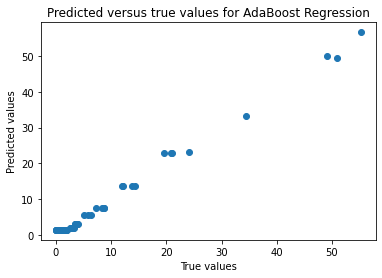

In [53]:
from sklearn.ensemble import AdaBoostRegressor

def train_test_adaboost_regression(X_train, X_test, y_train, y_test, scorer, dataset_id, kfold_vs_size):
    # Reshape y_train and y_test using ravel()
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    adaboost_regression = AdaBoostRegressor(random_state=42)
    grid_parameters_adaboost_regression = {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.001, 0.01, 0.1, 1.0]}
    start_time = time.time()
    
    grid_obj = GridSearchCV(adaboost_regression, param_grid=grid_parameters_adaboost_regression,
                            cv=kfold_vs_size, n_jobs=-1, scoring=scorer, verbose=1)
    grid_fit = grid_obj.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    best_adaboost_regression = grid_fit.best_estimator_
    prediction = best_adaboost_regression.predict(X_test)
    r2 = r2_score(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    mae = mean_absolute_error(y_true=y_test, y_pred=prediction)
    
    # Compute evaluation metrics on true scale
    prediction_true_scale = prediction * datasets[dataset_id]['scaler_array'][:,-1]
    y_test_true_scale = y_test * datasets[dataset_id]['scaler_array'][:,-1]
    mae_true_scale = mean_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    medae_true_scale = median_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    mse_true_scale = mean_squared_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    MSE_true_scale = mse_true_scale * (y_test.max() - y_test.min())**2
    RMSE_true_scale = sqrt(MSE_true_scale)
    MAE_true_scale = mae_true_scale * (y_test.max() - y_test.min())
    MedAE_true_scale = medae_true_scale * (y_test.max() - y_test.min())

    # Print evaluation metrics
    print("Evaluation metrics for dataset ", dataset_id)
    print("R^2 score: ", r2)
    print("Mean Squared Error: ", mse)
    print("Mean Absolute Error: ", mae)
    print("MSE (true scale): ", MSE_true_scale)
    print("RMSE (true scale): ", RMSE_true_scale)
    print("MAE (true scale): ", MAE_true_scale)
    print("MedAE (true scale): ", MedAE_true_scale)
    
    # Compute prediction on true scale
    prediction_true_scale = prediction * datasets[dataset_id]['scaler_array'][:,-1]
    y_test_true_scale = y_test * datasets[dataset_id]['scaler_array'][:,-1]

    # Plot predicted versus true values
    plt.scatter(y_test_true_scale, prediction_true_scale)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.title('Predicted versus true values for AdaBoost Regression')
    plt.show()
    
train_test_adaboost_regression(X_train, X_test, y_train, y_test, scorer, dataset_id, kfold_vs_size)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Evaluation metrics for dataset  scaled_raw
R^2 score:  0.9981035174723178
Mean Squared Error:  7.232395684529126e-05
Mean Absolute Error:  0.0038622216777393606
MSE (true scale):  0.21989517594197763
RMSE (true scale):  0.4689298198472535
MAE (true scale):  0.21296290331054832
MedAE (true scale):  0.06381900091530687


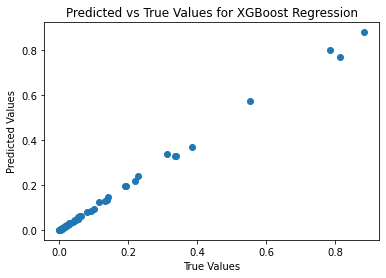

In [50]:
from xgboost import XGBRegressor

def train_test_xgb_regression(X_train, X_test, y_train, y_test, scorer, dataset_id, kfold_vs_size):
    # Reshape y_train and y_test using ravel()
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    xgb_regression = XGBRegressor(random_state=42)
    grid_parameters_xgb_regression = {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.001, 0.01, 0.1, 1.0]}
    start_time = time.time()
    
    grid_obj = GridSearchCV(xgb_regression, param_grid=grid_parameters_xgb_regression,
                            cv=kfold_vs_size, n_jobs=-1, scoring=scorer, verbose=1)
    grid_fit = grid_obj.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    best_xgb_regression = grid_fit.best_estimator_
    prediction = best_xgb_regression.predict(X_test)
    r2 = r2_score(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    mae = mean_absolute_error(y_true=y_test, y_pred=prediction)
    
    # Compute evaluation metrics on true scale
    prediction_true_scale = prediction * datasets[dataset_id]['scaler_array'][:,-1]
    y_test_true_scale = y_test * datasets[dataset_id]['scaler_array'][:,-1]
    mae_true_scale = mean_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    medae_true_scale = median_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    mse_true_scale = mean_squared_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
    MSE_true_scale = mse_true_scale * (y_test.max() - y_test.min())**2
    RMSE_true_scale = sqrt(MSE_true_scale)
    MAE_true_scale = mae_true_scale * (y_test.max() - y_test.min())
    MedAE_true_scale = medae_true_scale * (y_test.max() - y_test.min())

    # Print evaluation metrics
    print("Evaluation metrics for dataset ", dataset_id)
    print("R^2 score: ", r2)
    print("Mean Squared Error: ", mse)
    print("Mean Absolute Error: ", mae)
    print("MSE (true scale): ", MSE_true_scale)
    print("RMSE (true scale): ", RMSE_true_scale)
    print("MAE (true scale): ", MAE_true_scale)
    print("MedAE (true scale): ", MedAE_true_scale)
    

    # Get predicted values
    xgb_regression = XGBRegressor(random_state=42, n_estimators=300, learning_rate=0.1)
    xgb_regression.fit(X_train, y_train)
    y_pred = xgb_regression.predict(X_test)

    # Visualize predicted vs true values
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs True Values for XGBoost Regression")
    plt.show()
    
train_test_xgb_regression(X_train, X_test, y_train, y_test, scorer, dataset_id, kfold_vs_size)